In [68]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from scipy.io import arff

from sklearn.datasets import fetch_openml





In [69]:
# opening the dataset
# converting dataset into pandas dataframe from a dictionary type file.

credit = fetch_openml(name='credit-g', version=1)

df_features = pd.DataFrame(data = credit['data'])

#defining target
df_target = pd.DataFrame(data = credit['target'])
#appending df_features and df_target
df = pd.concat([df_features, df_target], axis = 1)

# drop missing values
df.dropna()
df.dropna(inplace = True)

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [70]:
# displaying dataset
# displaying first few rows.
# counting null values
df
df.head()
df.isnull().sum()
df.value_counts()





checking_status  duration  credit_history  purpose              credit_amount  savings_status    employment  installment_commitment  personal_status     other_parties  residence_since  property_magnitude  age   other_payment_plans  housing   existing_credits  job                        num_dependents  own_telephone  foreign_worker  class
0<=X<200         6.0       all paid        education            433.0          >=1000            <1          4.0                     female div/dep/mar  none           2.0              life insurance      24.0  bank                 rent      1.0               skilled                    2.0             none           yes             bad      1
no checking      10.0      existing paid   new car              1364.0         <100              1<=X<4      2.0                     female div/dep/mar  none           4.0              car                 64.0  none                 own       1.0               skilled                    1.0             yes         

In [71]:
# encoding X_train and X_test
enc = OrdinalEncoder()


df[['class','credit_history', 'employment', 'personal_status']] = enc.fit_transform(df[['class', 'credit_history', 'employment', 'personal_status' ]]
)

selected_features = df[['credit_amount', 'age', 'existing_credits', 'num_dependents', 'credit_history', 'employment', 'personal_status']]
display(selected_features)



,credit_amount,age,existing_credits,num_dependents,credit_history,employment,personal_status
0,1169.0,67.0,2.0,1.0,1.0,3.0,3.0
1,5951.0,22.0,1.0,1.0,3.0,0.0,0.0
2,2096.0,49.0,1.0,2.0,1.0,1.0,3.0
3,7882.0,45.0,1.0,2.0,3.0,1.0,3.0
4,4870.0,53.0,2.0,2.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...
995,1736.0,31.0,1.0,1.0,3.0,1.0,0.0
996,3857.0,40.0,1.0,1.0,3.0,0.0,1.0
997,804.0,38.0,1.0,1.0,3.0,3.0,3.0
998,1845.0,23.0,1.0,1.0,3.0,0.0,3.0


In [72]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)


In [73]:
# defining y variable

y = df['class'].values

In [74]:
#creating a split (train/test)
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=45)


#creating a split (train/val)

X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=45)

# now the train/validate/test split will be 80%/10%/10%

In [75]:
# training the KNN model and predicting (test)
from sklearn.neighbors import KNeighborsClassifier 
#
K = 11
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score= model.score(X_test, y_test)
# training the same KNN model and predicting (validation)
y_predict = model.predict(X_val)

valscore= model.score(X_val, y_val)

print(str(score))
print ((y_pred))

print(str(valscore))
print ((y_predict))

0.72
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
0.76
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0.]


In [76]:
#OPTIMIZING THE KNN MODEL

#making a loop to run a range of nearest neighbours to find the best model for testing
err_rate = []
accuracy = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictions_i = knn.predict(X_test)
    
    err_rate.append(np.mean(predictions_i != y_test))
    accuracy.append(knn.score(X_test, y_test))
    
#making a loop to run a range of nearest neighbours to find the best model for validating
valerror_rate = []
accuracyval = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predictions_ival = knn.predict(X_val)
    
    valerror_rate.append(np.mean(predictions_ival != y_val))
    accuracyval.append(knn.score(X_val, y_val))


In [77]:
# printing accuracy results (testing)
accuracy

[0.6,
 0.55,
 0.61,
 0.64,
 0.67,
 0.62,
 0.71,
 0.69,
 0.7,
 0.71,
 0.72,
 0.71,
 0.7,
 0.71,
 0.71,
 0.7,
 0.7,
 0.69,
 0.7]

In [78]:
#printing accuracy results for validating
accuracyval

[0.68,
 0.56,
 0.73,
 0.68,
 0.73,
 0.72,
 0.74,
 0.76,
 0.75,
 0.76,
 0.76,
 0.76,
 0.74,
 0.73,
 0.73,
 0.74,
 0.73,
 0.73,
 0.73]

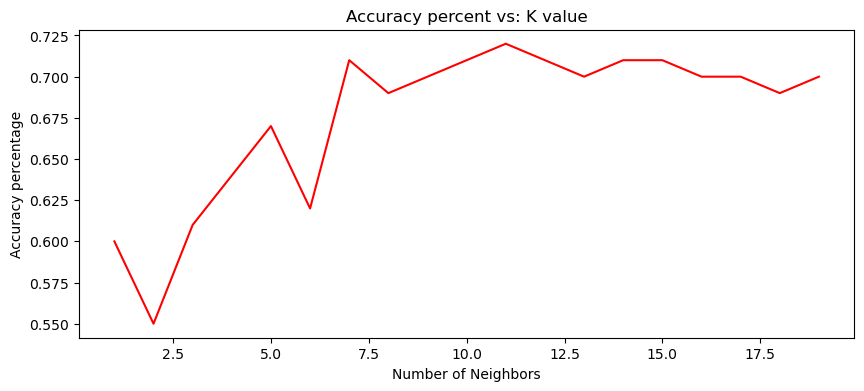

In [79]:
#plotting accuracy (testing) percentage VS K values
plt.figure(figsize = (10,4))

plt.plot(range(1,20), accuracy, color ="red" )
plt.title("Accuracy percent vs: K value")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy percentage")

plt.show()

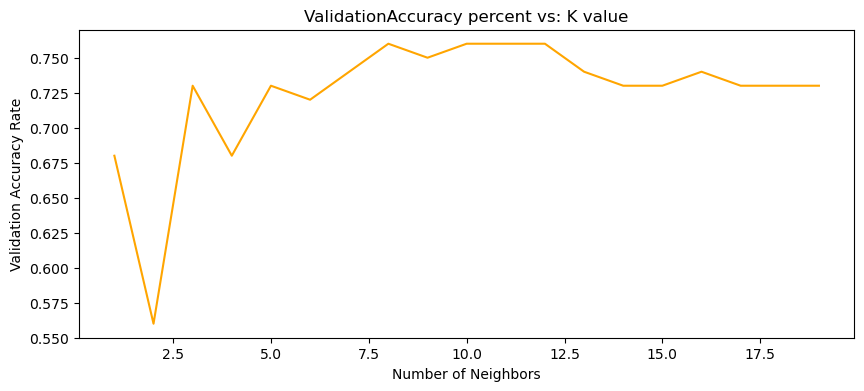

In [80]:
#plotting accuracy (validation) percentage vs K values
plt.figure(figsize = (10,4))

plt.plot(range(1,20), accuracyval, color ="orange" )
plt.title("ValidationAccuracy percent vs: K value")
plt.xlabel("Number of Neighbors")
plt.ylabel("Validation Accuracy Rate")

plt.show()

In [81]:
print ("Conclusion: Based on above graphs, k = 10 is the optimal point for number of neighbors")

Conclusion: Based on above graphs, k = 10 is the optimal point for number of neighbors


In [82]:
# printing maximum accuracy (testing) score
max (accuracy)

0.72

In [83]:
# printing maximum accuracy (validating) score
max (accuracyval)

0.76

In [84]:
# running the model for best accuarcy (testing)
bestaccuracy_knn = accuracy.index(max(accuracy)) + 1  
print(bestaccuracy_knn)

# Run the best model

bestaccuracy_knn_model = KNeighborsClassifier(n_neighbors = bestaccuracy_knn)
bestaccuracy_knn_model.fit(X_train, y_train)


print(bestaccuracy_knn_model.score(X_test, y_test))

11
0.72


In [85]:
# running the model for best accuracy (validation)
bestaccuracyval_knn = accuracyval.index(max(accuracyval)) + 1 
print(bestaccuracyval_knn)

# Run the best model

bestaccuracyval_knn_model = KNeighborsClassifier(n_neighbors = bestaccuracyval_knn)
bestaccuracyval_knn_model.fit(X_train, y_train)

print(bestaccuracyval_knn_model.score(X_val, y_val))

8
0.76


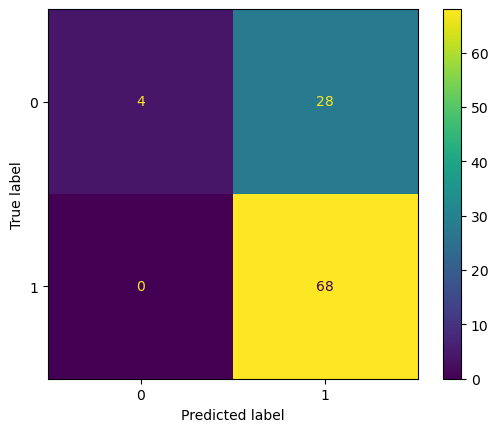

In [86]:
# displaying confusion matrix (testing)
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state = 0))
clf.fit(X_train, y_train)
y_predclf = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predclf)
cm_display = ConfusionMatrixDisplay(cm).plot()

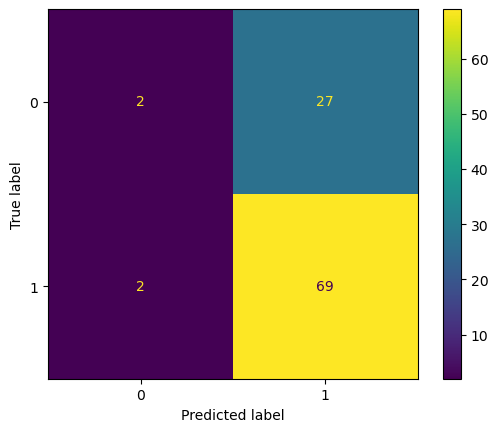

In [87]:
# printing confusion matrix for validating
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state = 0))
clf.fit(X_train, y_train)
y_predclf1 = clf.predict(X_val)
cm1 = confusion_matrix(y_val, y_predclf1)
cm_display1 = ConfusionMatrixDisplay(cm1).plot()